# Contents

1. Common Methods
       
2. Data preprocessing
       
3. Vanilla Auto Encoder
       
4. Deep Autoencoder
       
5. Sparse Auto Encoder

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Input, Dense
from keras.models import Model
#from keras.regularizers import Regularizers
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers

%matplotlib inline

Using TensorFlow backend.


# Common Methods

In [13]:
def show_result(test_imgs, latent_imgs, output_imgs, n=5, latent_img_width=8, latent_img_height=8):
    
    plt.figure(figsize=(n, 4))
    
    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i + 1) 
        plt.imshow(test_imgs[i].reshape(28, 28)) 
        plt.gray()
        # display code
        ax = plt.subplot(3, n, i + 1 + n) 
        plt.imshow(latent_imgs[i].reshape(latent_img_width, latent_img_height))
        plt.gray()

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2*n) 
        plt.imshow(output_imgs[i].reshape(28, 28)) 
        plt.gray()
    plt.show()

In [3]:
def model_history_plot(history):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

# Data preprocessing

In [4]:
# read dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# normalize all values between 0 and 1 and flatten
# the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Deep Autoencoder

In [26]:
def getDeepAE(epochs=2, verbose=1):
    encodig_dim = 64 
    # input layer
    input_layer = Input(shape=(784,))
    # encoding architecture
    encode_layer1 = Dense(512, activation='relu')(input_layer)
    encode_layer2 = Dense(256, activation='relu')(encode_layer1)
    encode_layer3 = Dense(128, activation='relu')(encode_layer2)
    # latent view
    latent_view = Dense(encodig_dim, activation='sigmoid')(encode_layer3)
    # decoding architecture
    decode_layer1 = Dense(128, activation='relu')(latent_view)
    decode_layer2 = Dense(256, activation='relu')(decode_layer1)
    decode_layer3 = Dense(512, activation='relu')(decode_layer2)
    # output layer
    output_layer = Dense(784)(decode_layer3)
    # model
    model = Model(input_layer, output_layer)

    model.summary()

    model.compile(optimizer='adadelta', loss='mse')

    #fit autoencoder
    fit = model.fit(x_train, x_train, epochs=epochs,  shuffle=True, 
              validation_data=(x_test, x_test),
              verbose=verbose)


    # model_history_plot(fit.history)

    # Following codes are written for demonstration purpose only

    encoder = Model(input_layer, latent_view)
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = model.predict(x_test)
    
    n = 20
    
    show_result(x_test, encoded_imgs, decoded_imgs)

    return model

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_70 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_73 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_74 (Dense)             (None, 256)               330

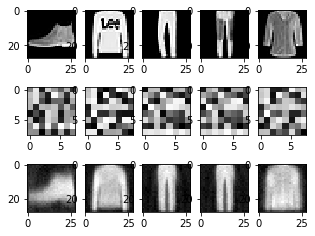

In [28]:
getDeepAE(epochs=1)

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_82 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_83 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_84 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_85 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_86 (Dense)             (None, 256)               330

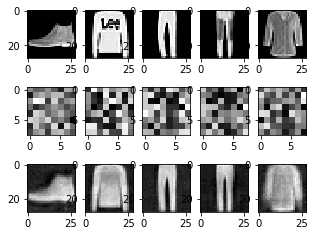

In [33]:
getDeepAE(epochs=10)

# Sparse Autoencoder

In [14]:
def getSparseAE(epochs=2, verbose=1):
    # input layer
    input_layer = Input(shape=(784,))
    # encoding architecture
    encode_layer1 = Dense(1024, activation='relu')(input_layer)
    encode_layer2 = Dense(1024, activation='relu')(encode_layer1)
    # latent view
    latent_view = Dense(1024, activation='sigmoid', activity_regularizer=regularizers.l1(1e-5))(encode_layer2)
    # decoding architecture
    decode_layer1 = Dense(1024, activation='relu')(latent_view)
    decode_layer2 = Dense(1024, activation='relu')(decode_layer1)
    # output layer
    output_layer = Dense(784)(decode_layer2)
    # model
    model = Model(input_layer, output_layer)
    
    
    # model.summary()

    model.compile(optimizer='adadelta', loss='mse')

    # fit autoencoder
    fit = model.fit(x_train, x_train, epochs=epochs,  shuffle=True, 
              validation_data=(x_test, x_test),
              verbose=verbose)


    # model_history_plot(fit.history)

    # Following codes are written for demonstration purpose only

    encoder = Model(input_layer, latent_view)
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = model.predict(x_test)
    
    n = 20
    
    show_result(x_test, encoded_imgs, decoded_imgs, latent_img_width=32, latent_img_height=32)
    
   
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 19s 309us/step - loss: 0.0623 - val_loss: 0.0425


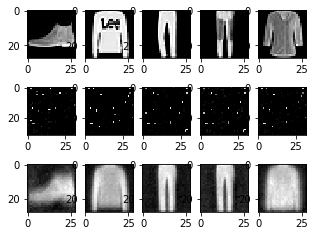

In [15]:
getSparseAE(epochs=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0625 - val_loss: 0.0414
Epoch 2/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0372 - val_loss: 0.0332
Epoch 3/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0312 - val_loss: 0.0292
Epoch 4/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0287 - val_loss: 0.0276
Epoch 5/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0271 - val_loss: 0.0260
Epoch 6/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0259 - val_loss: 0.0249
Epoch 7/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0248 - val_loss: 0.0240
Epoch 8/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0239 - val_loss: 0.0236
Epoch 9/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.0231 - val_

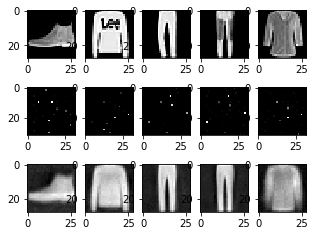

In [16]:
getSparseAE(epochs=10)